In [10]:
import numpy as np
import scipy.stats as stat
import matplotlib.pyplot as plt

In [11]:
def softmax(x):
    ex = np.exp(x)
    sum_ex = np.sum( np.exp(x))
    return ex/sum_ex

In [12]:
#Environment with dimenions as tuple, reward
def get_environment(dimensions):
    environment = np.zeros(dimensions) - 10
    environment[40:50, 40:50] = 10
    return environment
environment = get_environment((96, 54))

In [13]:
actions = np.array(np.meshgrid([0, 1, -1], [0, 1, -1])).T.reshape(-1, 2)

In [14]:
actions

array([[ 0,  0],
       [ 0,  1],
       [ 0, -1],
       [ 1,  0],
       [ 1,  1],
       [ 1, -1],
       [-1,  0],
       [-1,  1],
       [-1, -1]])

In [15]:
def step(state, action, rotate):
    """
    if rotate:
        for i in range(9):
            if np.array(action == actions[i]).all():
                if i == 0:
                    action_index = i
                else:
                    action_index = (i+1)%9
        action = actions[action_index]
    """
    #print (action)
    if rotate:
        action_x = action[0]*np.cos(-np.pi/2) + action[1]*np.sin(-np.pi/2) 
        action_y = -action[0]*np.sin(-np.pi/2) + action[1]*np.cos(-np.pi/2)
        action[0], action[1] = action_x, action_y
        #print (action)
    new_state = np.array([state[0] + action[0], state[1] + action[1]])

    #print (new_state)
    #Control for exiting the allowed space. Don't let it
    if new_state[0] >= len(environment[:, 0]) - 1 or new_state[1] >= len(environment[0]) - 1 or new_state[0] < 0 or new_state[1] < 0:
        #print ('Here')
        new_state = state[0], state[1]
    
    reward = environment[new_state[0], new_state[1]]
    #If you encounter reward, restart from the center
    #if reward > 0:
    #    new_state = [0, 0]
        
    return np.array(new_state), reward

In [16]:
def select_action_epsilon_greedy(state, epsilon):
    if np.random.rand(1) < epsilon:
        action = np.random.choice([0, 1, -1], 2)
    else:
        next_values = list()
        actions = np.array(np.meshgrid([0, 1, -1], [0, 1, -1])).T.reshape(-1, 2)
        for action in actions:
            look_one_ahead_state, reward = step(state, action, 0)
            next_values.append(values[look_one_ahead_state[0], look_one_ahead_state[1]])
        action = actions[np.argmax(np.array(next_values))]
    return action

In [17]:
def select_action_softmax(state):
    next_values = list()
    actions = np.array(np.meshgrid([0, 1, -1], [0, 1, -1])).T.reshape(-1, 2)
    for action in actions:
        look_one_ahead_state, reward = step(state, action, 0)
        next_values.append(values[look_one_ahead_state[0], look_one_ahead_state[1]])
    softmax_scores = softmax(next_values)
    softmax_scores_cum = np.cumsum(softmax_scores)
    rand = np.random.rand()
    for i in range(len(softmax_scores_cum)):
        if softmax_scores_cum[i] > rand:
            action = actions[i]
            break
#    action = actions[np.argmax(np.array(next_values))]
    return action

In [18]:
def run_batch(episodes, alpha, gamma, values, rotate):
    state = np.array([0, 0])
    #alpha = 0.05
    #episodes = 1000
    count = 0
    for episode in range(episodes):
        state_x = list()
        state_y = list()
        while True:
    #        action = select_action_epsilon_greedy(state, epsilon)
            action = select_action_softmax(state)
            new_state, reward = step(state, action, rotate)
            values[state[0], state[1]] = values[state[0], state[1]] + alpha*(reward + gamma*values[new_state[0], new_state[1]] - values[state[0], state[1]])
            state[0], state[1] = new_state[0], new_state[1]
            state_x.append(state[0])
            state_y.append(state[1])
            if reward > 0:
                state = np.array([0, 0])
                #print (state)
                count = count + 1
                if count%100 == 0:
                    #epsilon = 10*epsilon/count
                    alpha = 100*alpha/count
                    print (reward)
                break
    return state_x, state_y, values

In [19]:
values = np.random.rand(len(environment[:, 0]), len(environment[0])) 


In [20]:
x, y, values = run_batch(3000, 0.5, 0.99, values, 0)

10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0


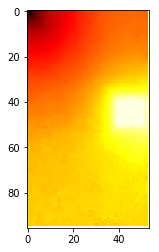

In [21]:
plt.imshow(values, cmap='hot', interpolation='nearest')

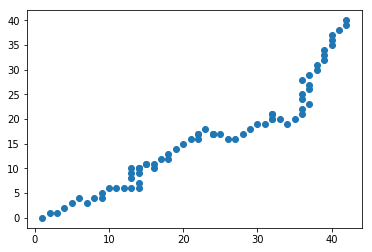

In [22]:
plt.scatter(x, y)

In [39]:
x, y, values = run_batch(1, 0.15, 0.99, values, 1)

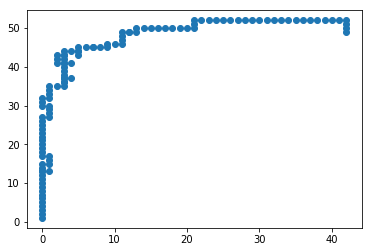

In [38]:
plt.scatter(x, y)